Data generator is in the [`index_dynamic_pattern_all_stded.py`](/work/mh0033/m300883/3rdPanel/scripts/first10_last10/dynamical_pattern/index_dynamic_pattern_all_stded.py)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import src.plots.vertical_profile as profile_plots
import src.plots.PDF as pdf_plots
import src.extreme.period_pattern_extreme as extreme
import src.plots.plot_violin as violin_plots

In [4]:
import importlib
importlib.reload(profile_plots)

<module 'src.plots.vertical_profile' from '/work/mh0033/m300883/3rdPanel/src/plots/vertical_profile.py'>

# configs

In [50]:
vertical_eof = 'ind'  # independently decompose each altitude levels
pattern = 'all'       # project onto the 'all' pattern (150 years and 100 ensemble members)

if vertical_eof == 'dep':
    folder = 'all_whole_std'
elif vertical_eof == 'ind':
    folder = 'ind_all_whole'

# Functions

change 'dep' or 'ind'

In [33]:
def read_index(pattern,vertical_eof):
    """read index different_patterns"""
    odir = '/work/mh0033/m300883/3rdPanel/data/allPattern/'+vertical_eof+'/'+pattern+'_pattern/'
    fpath = odir+'all_'+pattern+'_nonstd.nc'
    all_index = xr.open_dataset(fpath)
    return all_index.pc

In [34]:
def standardize(index,dim = ('time','ens')):
    """
    standardardize with the mean and std of 'time' and 'ens'.
    """
    mean = index.mean(dim = dim)
    std = index.std(dim = dim)
    index = (index-mean)/std
    return index

read data

indicate the pattern

In [35]:
all_all = read_index(pattern = pattern,vertical_eof=vertical_eof)

# stadnard with *period* mean and std

## periods

select

In [9]:
first10_all = all_all.isel(time = slice(0,10))
last10_all = all_all.isel(time = slice(-10,all_all.time.size))

standardize with own mean and std

In [10]:
first10_all_period = standardize(first10_all)
last10_all_period = standardize(last10_all)

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


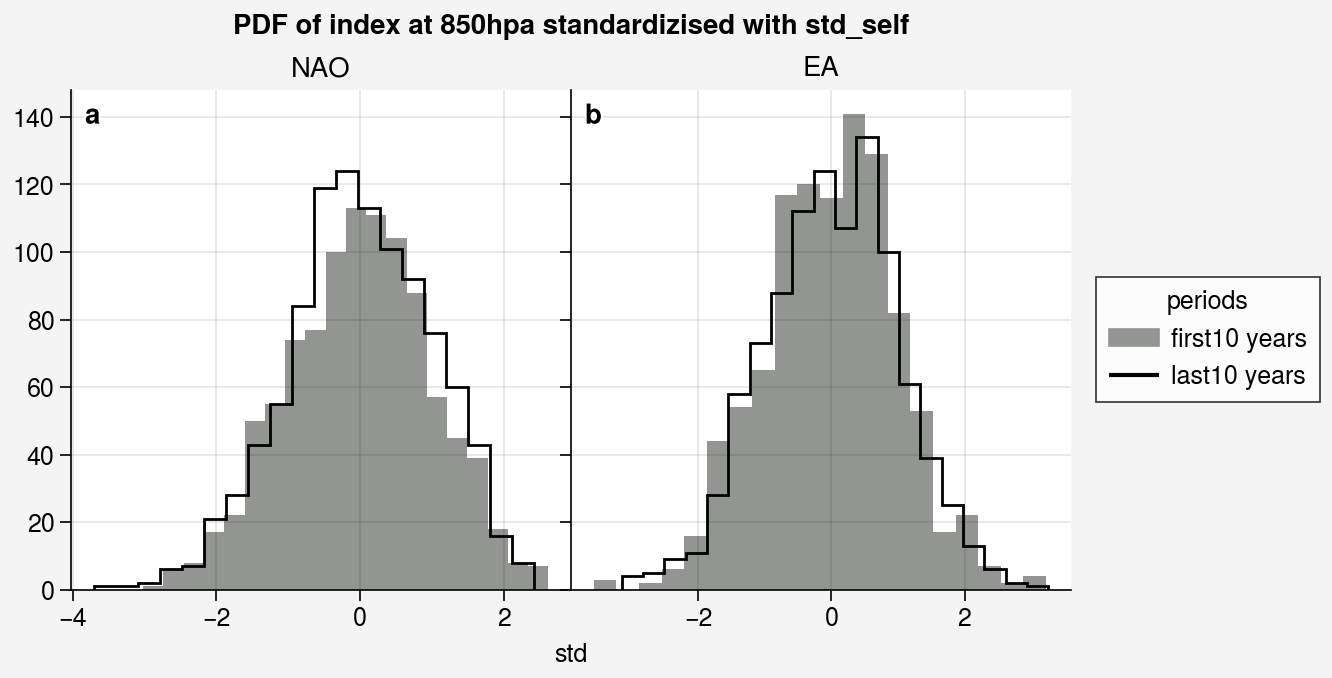

In [11]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 85000,bins = 20)

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


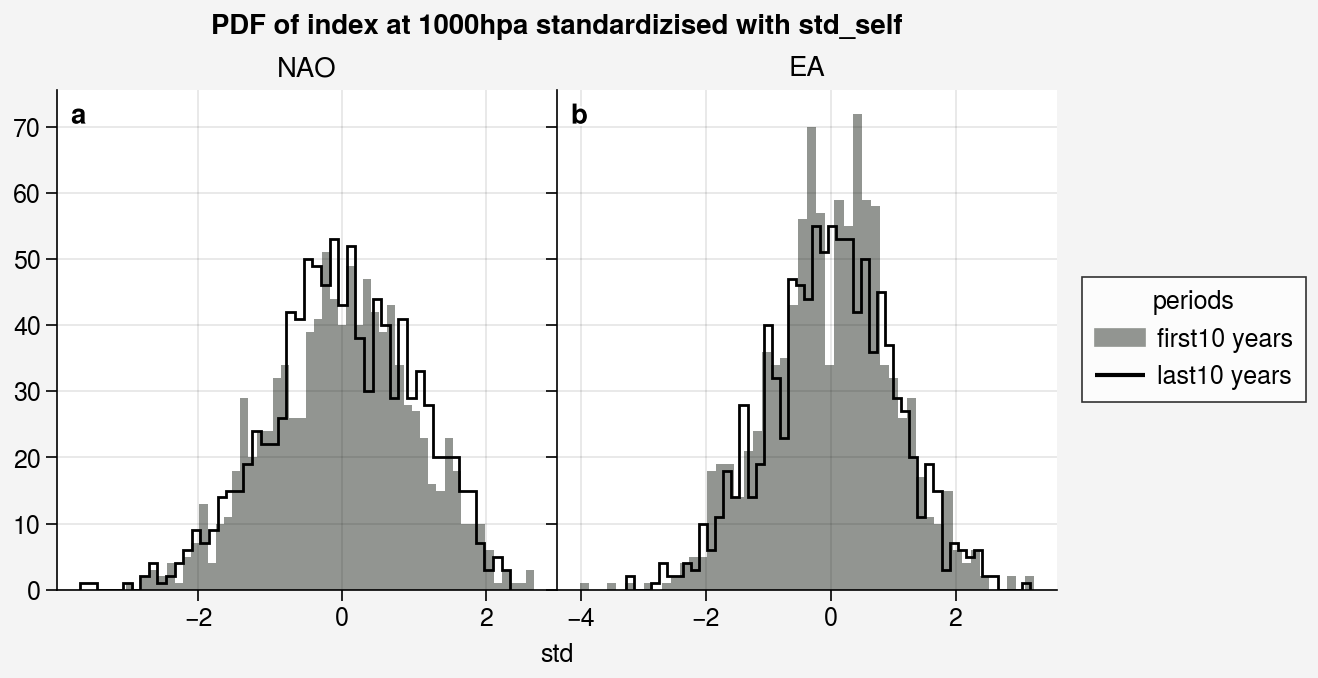

In [12]:
pdf_plots.plot_hist(first10_all_period,last10_all_period,'std_self',hlayers = 100000,bins = 50)


## Violin

CartesianAxesSubplot(index=(1, 1), number=2)

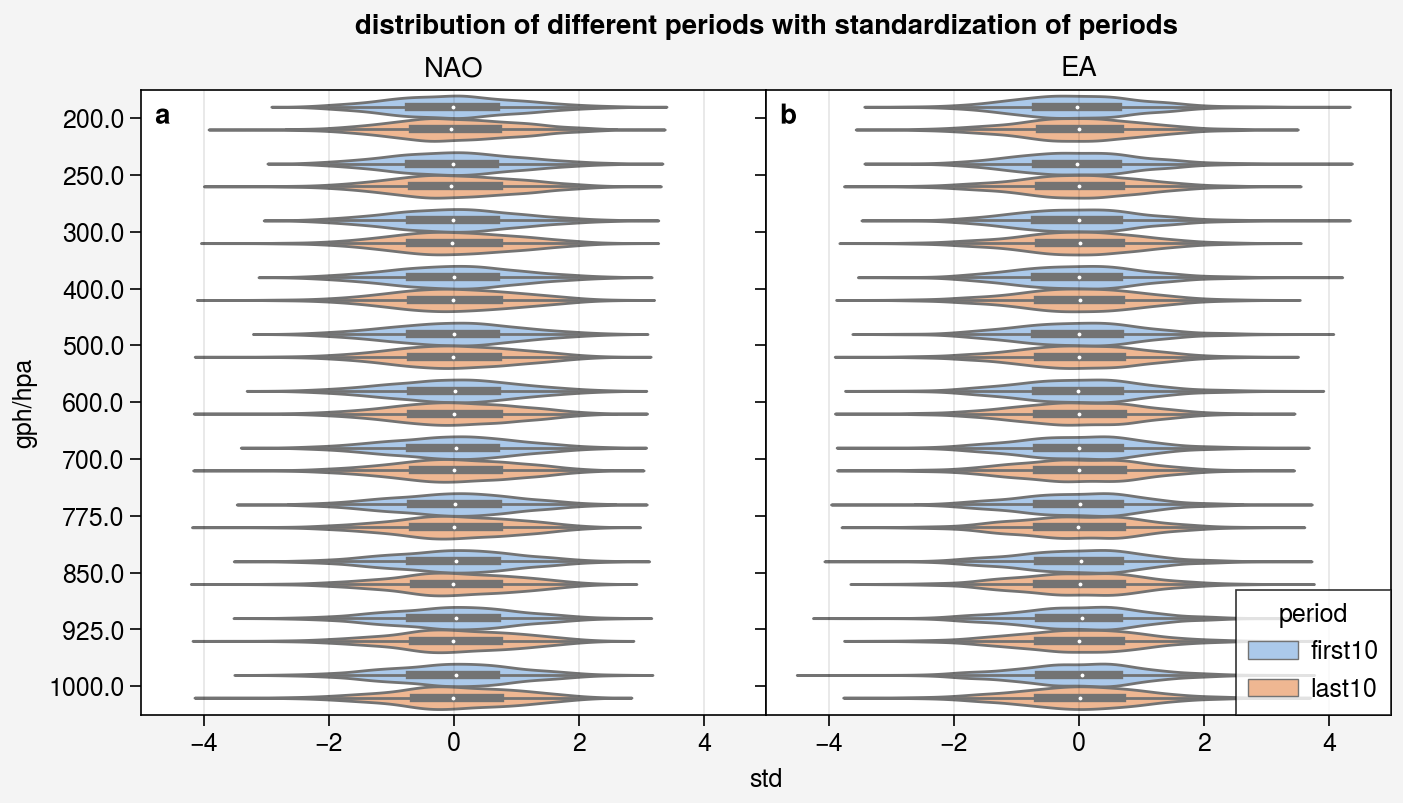

In [13]:
violin_plots.plot_vilion(first10_all_period, last10_all_period,std_type = 'periods')

## Profile

Extreme count

In [14]:
first10_all_period_ec = extreme.period_extreme_count(first10_all_period)
last10_all_period_ec = extreme.period_extreme_count(last10_all_period)

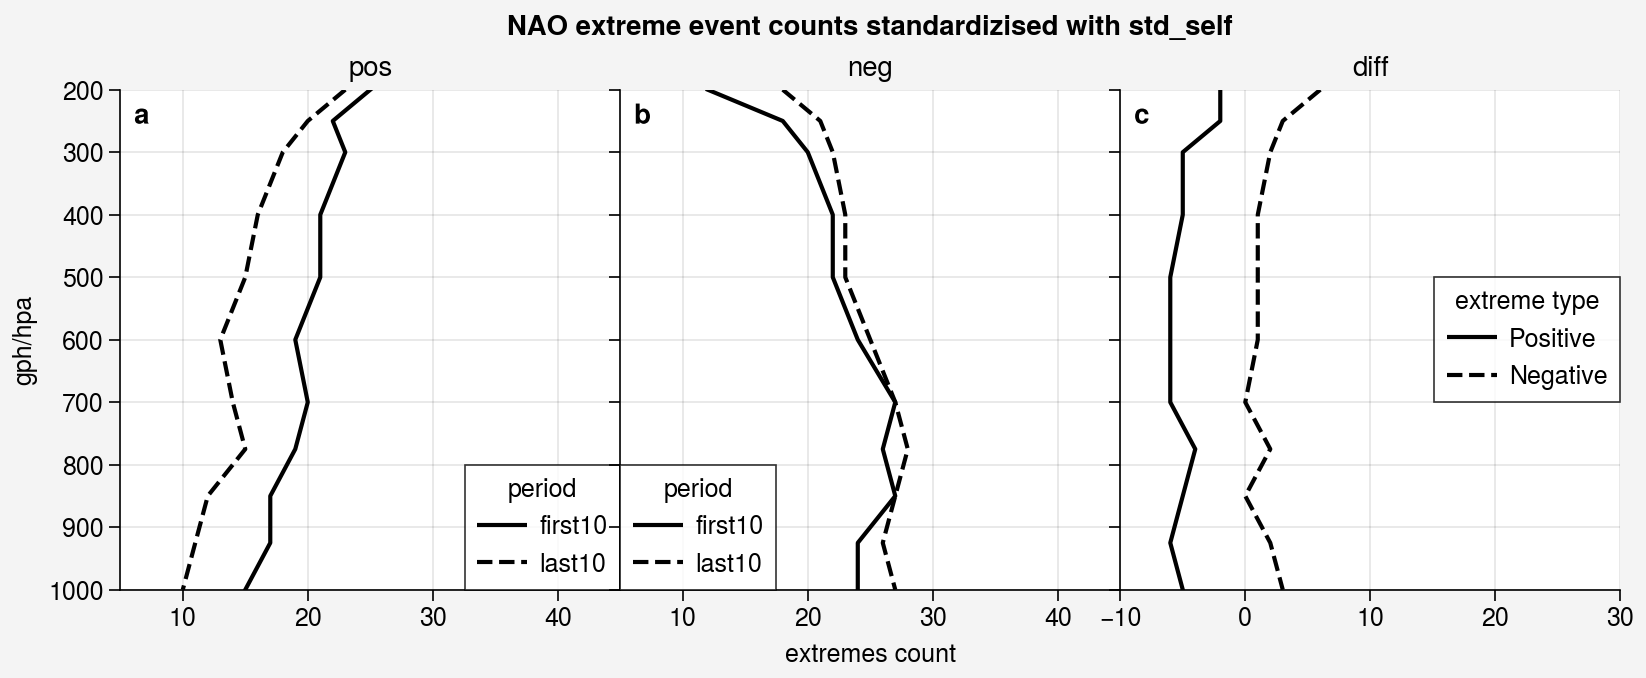

In [15]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'NAO',std_type='std_self')

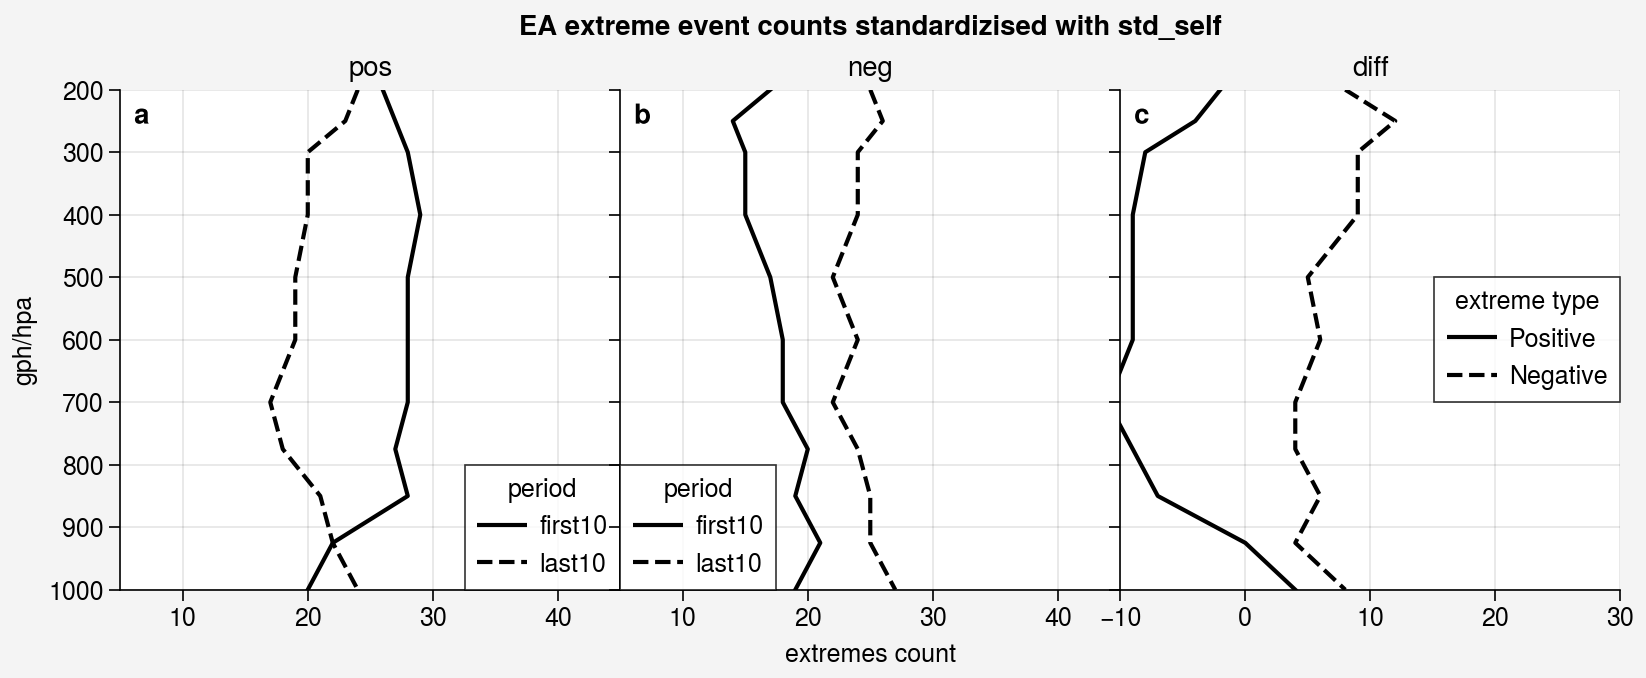

In [16]:
profile_plots.plot_vertical_profile(first10_all_period_ec,last10_all_period_ec,mode = 'EA',std_type='std_self')

# stadnard with *whole* mean and std

In [36]:
all_all_whole = standardize(all_all)

In [37]:
first10_all_whole = all_all_whole.isel(time = slice(0,10))
last10_all_whole = all_all_whole.isel(time = slice(-10,all_all.time.size))

## PDF

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


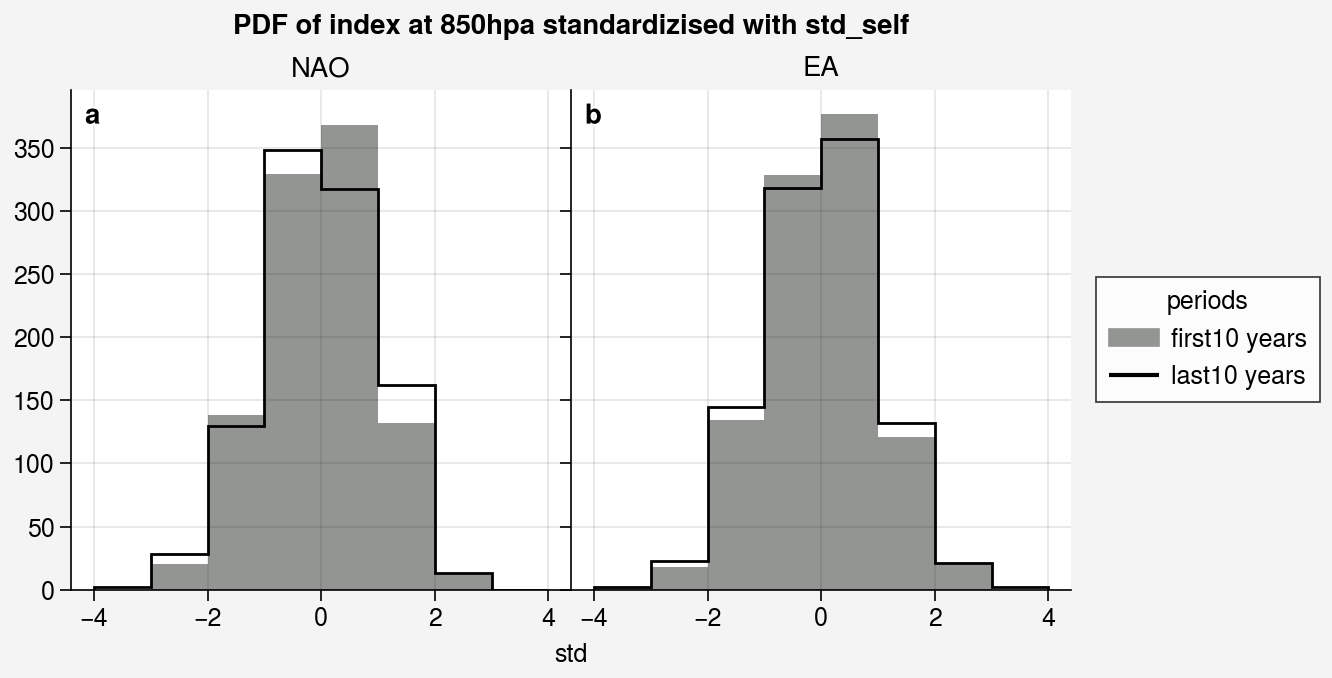

In [38]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 85000,bins = np.arange(-4,4.1,1))

/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(
/work/mh0033/m300883/3rdPanel/src/plots/PDF.py:22: ProplotWarning: Got conflicting or duplicate keyword args: {'xlocator': array([-4., -2.,  0.,  2.,  4.]), 'xticks': 5}. Using the first one.
  axes.format(


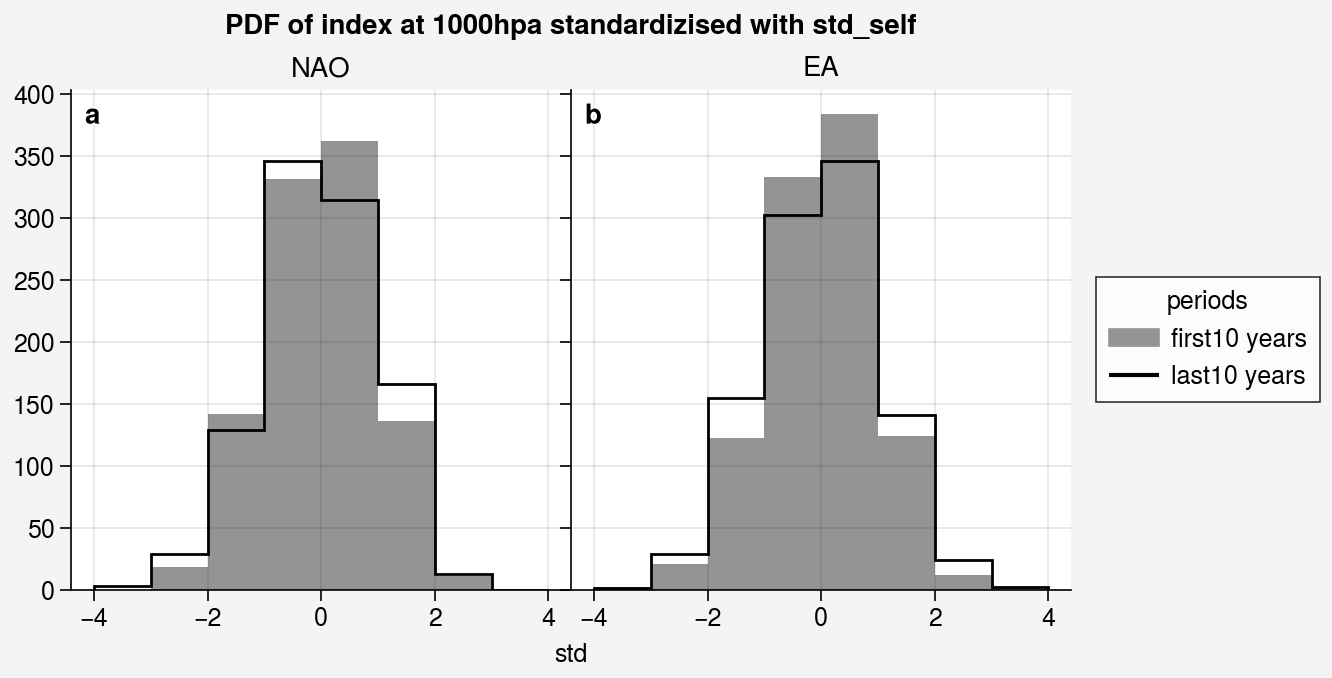

In [39]:
pdf_plots.plot_hist(first10_all_whole,last10_all_whole,'std_self',hlayers = 100000,bins = np.arange(-4,4.1,1))


In [40]:
# first10_all_whole.to_netcdf("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/first10_all_whole.nc")

In [41]:
# last10_all_whole.to_netcdf("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/last10_all_whole.nc")

In [42]:
whole_NAO = violin_plots.xr2df(first10_all_whole,last10_all_whole,mode = 'NAO')

In [44]:
whole_NAO_500 = whole_NAO[whole_NAO['hlayers'] == 500][['period','NAO']].reset_index()

In [45]:
whole_NAO_500

,com,period,NAO
0,0,first10,0.659380
1,1,first10,0.047895
2,2,first10,-0.201512
3,3,first10,0.783117
4,4,first10,2.057616
...,...,...,...
1995,995,last10,-0.869525
1996,996,last10,-0.679214
1997,997,last10,-0.357270
1998,998,last10,-1.405918


<AxesSubplot:xlabel='NAO', ylabel='Count'>

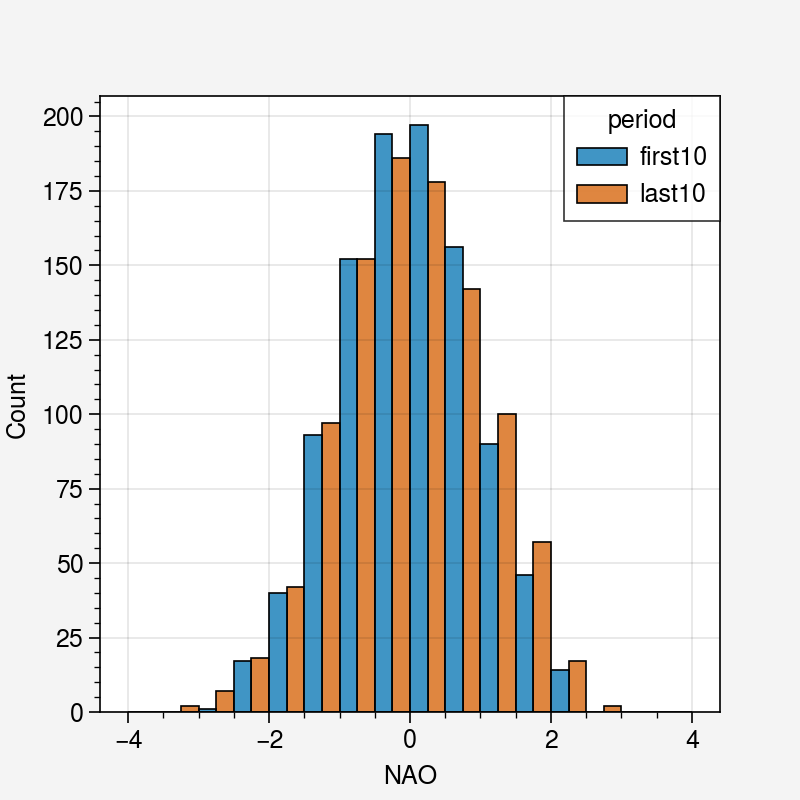

In [46]:
sns.histplot(data = whole_NAO_500,x = 'NAO',hue = 'period',multiple = "dodge",shrink=1,bins = np.arange(-4,4.1,0.5))

## Vilion plots

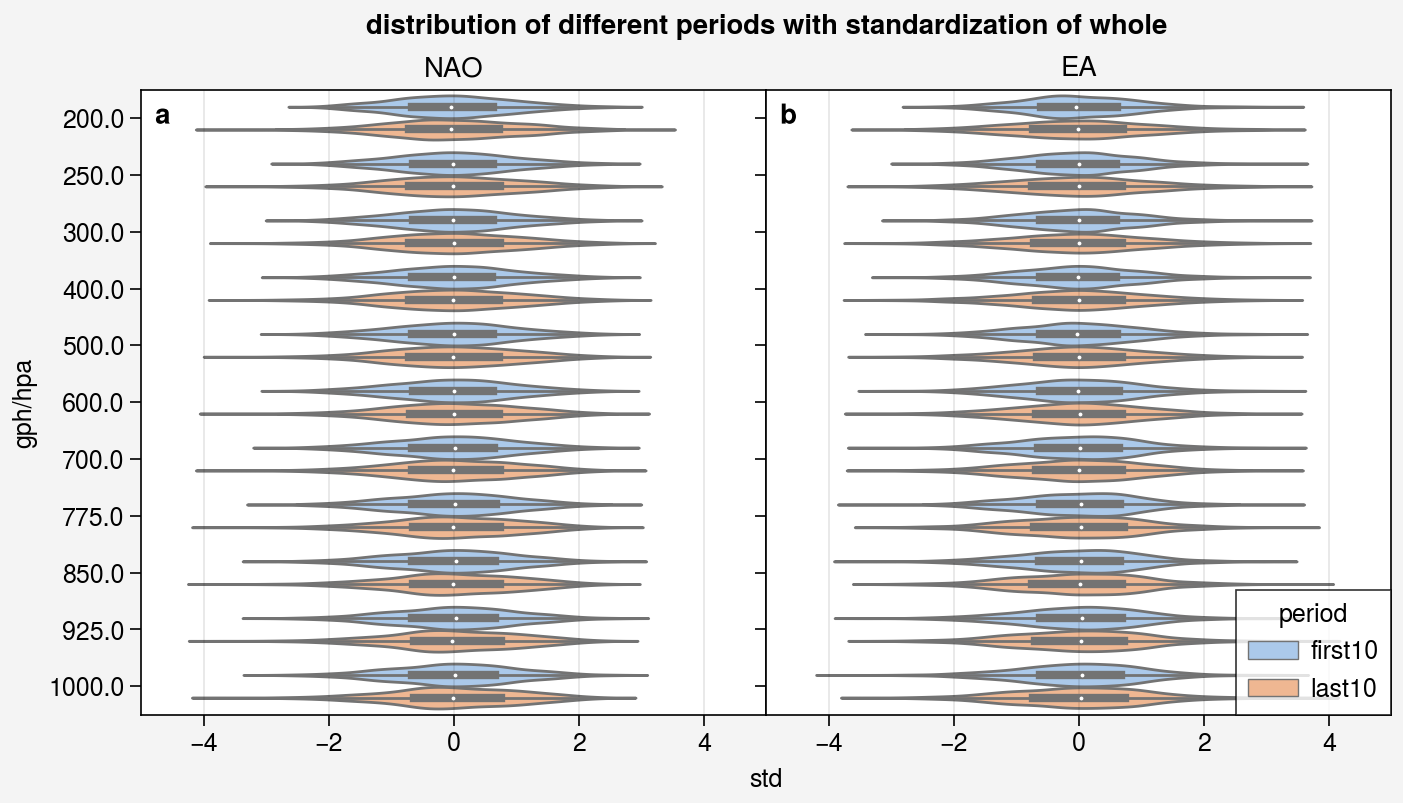

In [47]:
violin_plots.plot_vilion(first10_all_whole, last10_all_whole, 'whole')
plt.savefig("/work/mh0033/m300883/3rdPanel/docs/source/plots/first10_last10/"+folder+"/violin_vertical.png")

## Profile

Extreme count

In [49]:
first10_all_whole_ec = extreme.period_extreme_count(first10_all_whole)
last10_all_whole_ec = extreme.period_extreme_count(last10_all_whole)

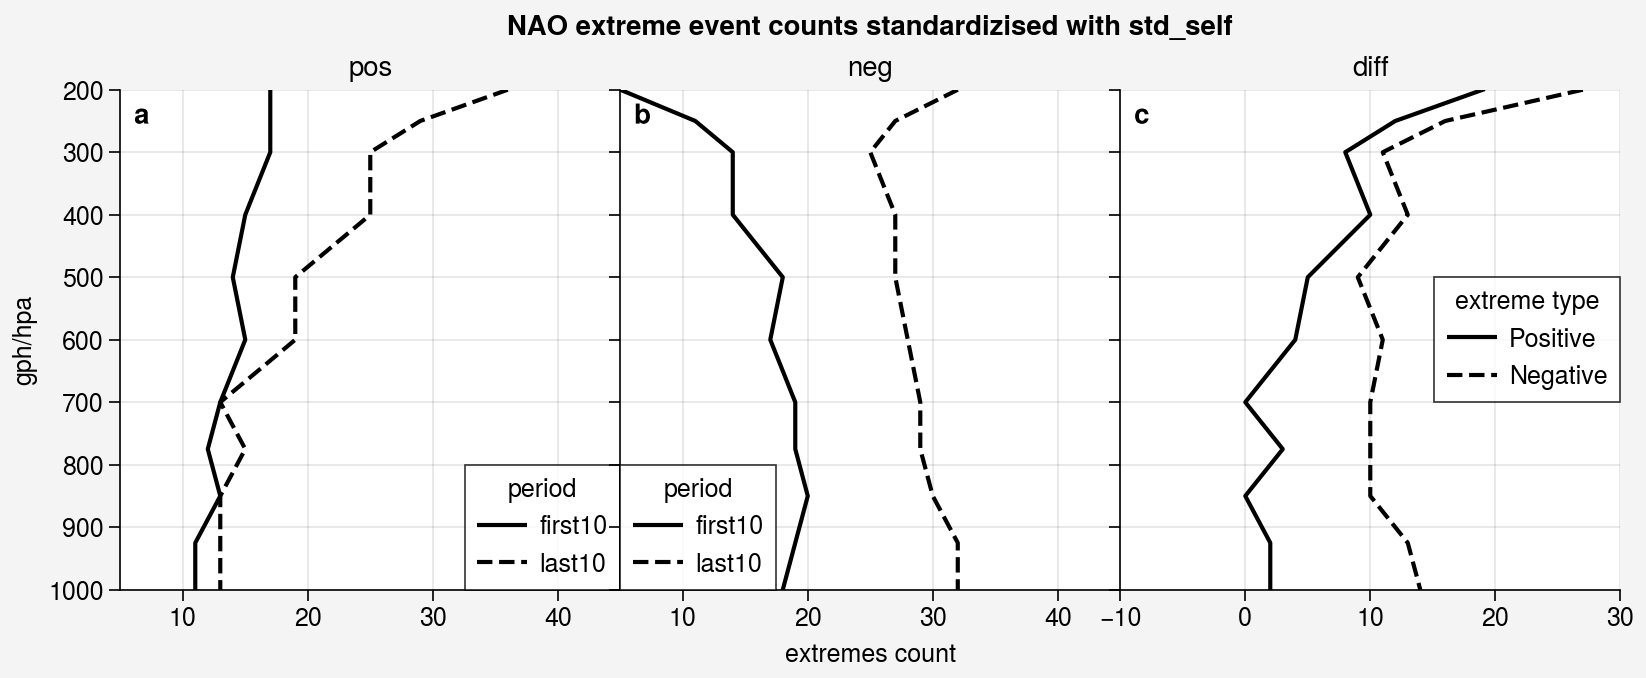

In [51]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'NAO',std_type='std_self')
plt.savefig("/work/mh0033/m300883/3rdPanel/docs/source/plots/first10_last10/"+folder+"/NAO_profile.png")


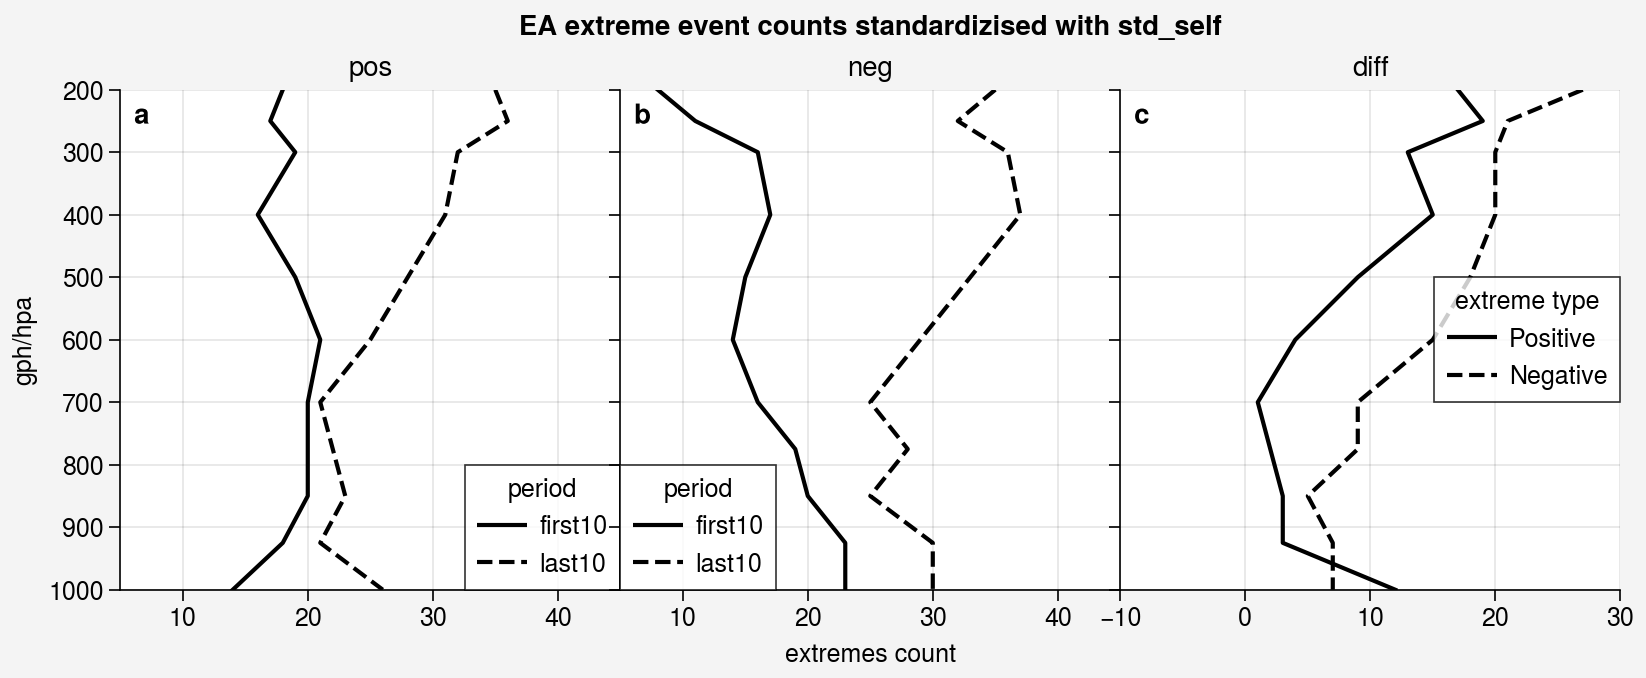

In [53]:
profile_plots.plot_vertical_profile(first10_all_whole_ec,last10_all_whole_ec,mode = 'EA',std_type='std_self')
plt.savefig("/work/mh0033/m300883/3rdPanel/docs/source/plots/first10_last10/"+folder+"/EA_profile.png")
